In [1]:
using ITensors
let
  i = Index(10)           # index of dimension 10
  j = Index(20)           # index of dimension 20
  M = randomITensor(i,j)  # random matrix, indices i,j
  U,S,V = svd(M,i)        # compute SVD with i as row index
  @show M ≈ U*S*V         # = true

  nothing
end

M ≈ U * S * V = true


In [2]:
using ITensors
let
  # Create 100 spin-one indices
  N = 100
  sites = siteinds("S=1",N)

  # Input operator terms which define
  # a Hamiltonian matrix, and convert
  # these terms to an MPO tensor network
  # (here we make the 1D Heisenberg model)
  ampo = OpSum()
  for j=1:N-1
    ampo += "Sz",j,"Sz",j+1
    ampo += 0.5,"S+",j,"S-",j+1
    ampo += 0.5,"S-",j,"S+",j+1
  end
  H = MPO(ampo,sites)

  # Create an initial random matrix product state
  psi0 = randomMPS(sites)

  # Plan to do 5 passes or 'sweeps' of DMRG,
  # setting maximum MPS internal dimensions
  # for each sweep and maximum truncation cutoff
  # used when adapting internal dimensions:
  sweeps = Sweeps(5)
  setmaxdim!(sweeps, 10,20,100,100,200)
  setcutoff!(sweeps, 1E-10)
  @show sweeps

  # Run the DMRG algorithm, returning energy
  # (dominant eigenvalue) and optimized MPS
  energy, psi = dmrg(H,psi0, sweeps)
  println("Final energy = $energy")

  nothing
end

sweeps = Sweeps
1 cutoff=1.0E-10, maxdim=10, mindim=1, noise=0.0E+00
2 cutoff=1.0E-10, maxdim=20, mindim=1, noise=0.0E+00
3 cutoff=1.0E-10, maxdim=100, mindim=1, noise=0.0E+00
4 cutoff=1.0E-10, maxdim=100, mindim=1, noise=0.0E+00
5 cutoff=1.0E-10, maxdim=200, mindim=1, noise=0.0E+00

After sweep 1 energy=-137.51280622996276  maxlinkdim=9 maxerr=4.05E-16 time=29.710
After sweep 2 energy=-138.9341974891062  maxlinkdim=20 maxerr=4.88E-06 time=1.400
After sweep 3 energy=-138.94007880607504  maxlinkdim=88 maxerr=1.00E-10 time=7.310
After sweep 4 energy=-138.94008600941183  maxlinkdim=100 maxerr=1.04E-10 time=15.517
After sweep 5 energy=-138.94008605721515  maxlinkdim=96 maxerr=1.00E-10 time=16.083
Final energy = -138.94008605721515


In [48]:
##BH-Model 
function energyfor(N, L, J)
#L = 9 #Number of Sites
#N = 9 #Number of bosons
sites = siteinds("Boson", L; dim = N ,  conserve_number = false, conserve_qns= true ) 
# C++ configuration
#sites = Boson(L, {"MaxOcc=", N, "ConserveQNs", true, "ConserveNb", false})
sweeps = Sweeps(5)
setmaxdim!(sweeps, 10, 10, 20, 20, 30, 30, 50)
setcutoff!(sweeps, 1E-16)

U = 1.0
#J = 1.0

ampo = OpSum()
for i in 1:(L-1)
    ampo += - U / 2, "N", i;
    ampo += U / 2, "N", i, "N", i;
    ampo += -J, "A", i, "Adag", i + 1;
    ampo += -J, "Adag", i, "A", i + 1;
end  
#Periodic terms 
ampo += -J, "A", 1, "Adag", L;
ampo += -J, "Adag", 1, "A", L; 
#term for interaction on the L site
ampo += -U/2, "N", L;
ampo += U/2, "N", L,"N", L; 
##########################
#ampo += V, "N", 1, "N", L;
H = MPO(ampo, sites)
state = ["1" for i in 1:L]
psi = randomMPS(sites, state)

energy, psi0 = dmrg(H, psi, sweeps) 
    return energy 
end

energyfor (generic function with 1 method)

In [49]:
using LaTeXStrings #Titles and labels 
using Plots

In [50]:
energyfor(4,5,1)

After sweep 1 energy=-8.194294250359553  maxlinkdim=10 maxerr=1.83E-05 time=0.027
After sweep 2 energy=-8.214510122747932  maxlinkdim=10 maxerr=1.73E-05 time=0.014
After sweep 3 energy=-8.214807336447883  maxlinkdim=14 maxerr=1.76E-32 time=0.019
After sweep 4 energy=-8.214807336958554  maxlinkdim=14 maxerr=6.36E-30 time=0.018
After sweep 5 energy=-8.214807336958561  maxlinkdim=14 maxerr=2.25E-27 time=0.017


-8.214807336958561

In [45]:
##Chemical potential
N = 8 
M = 8
valuesofen = []
for t in 0:0.01:0.50  
    push!(valuesofen, energyfor(N, M, t))
end  

valuesofenlow = [] 
for t in 0:0.01:0.50  
    push!(valuesofenlow, energyfor((N-1), M, t))
end


After sweep 1 energy=0.0  maxlinkdim=1 maxerr=0.00E+00 time=0.007
After sweep 2 energy=0.0  maxlinkdim=1 maxerr=0.00E+00 time=0.012
After sweep 3 energy=0.0  maxlinkdim=1 maxerr=0.00E+00 time=0.013
After sweep 1 energy=-0.0031868358463236213  maxlinkdim=10 maxerr=3.07E-12 time=0.060
After sweep 2 energy=-0.003199679604048521  maxlinkdim=10 maxerr=4.07E-11 time=0.082
After sweep 3 energy=-0.003199679753506768  maxlinkdim=20 maxerr=2.23E-14 time=0.186
After sweep 1 energy=-0.012750693868298857  maxlinkdim=10 maxerr=2.93E-10 time=0.053
After sweep 2 energy=-0.012794856133674646  maxlinkdim=10 maxerr=2.05E-09 time=0.104
After sweep 3 energy=-0.012794867292631018  maxlinkdim=20 maxerr=6.29E-12 time=0.182
After sweep 1 energy=-0.02867126958024846  maxlinkdim=10 maxerr=3.91E-09 time=0.041
After sweep 2 energy=-0.028773858787112427  maxlinkdim=10 maxerr=2.05E-08 time=0.110
After sweep 3 energy=-0.02877398510680207  maxlinkdim=20 maxerr=1.18E-10 time=0.195
After sweep 1 energy=-0.05091053006095

After sweep 2 energy=-2.9408057126604428  maxlinkdim=10 maxerr=9.25E-04 time=0.108
After sweep 3 energy=-2.9549506297315333  maxlinkdim=20 maxerr=3.65E-05 time=0.200
After sweep 1 energy=-3.049330421897004  maxlinkdim=10 maxerr=1.93E-04 time=0.043
After sweep 2 energy=-3.082449349818227  maxlinkdim=10 maxerr=1.02E-03 time=0.104
After sweep 3 energy=-3.096180875204794  maxlinkdim=20 maxerr=3.78E-05 time=0.195
After sweep 1 energy=-3.19051719485602  maxlinkdim=10 maxerr=1.86E-04 time=0.068
After sweep 2 energy=-3.224241659405692  maxlinkdim=10 maxerr=1.01E-03 time=0.100
After sweep 3 energy=-3.2382142120535655  maxlinkdim=20 maxerr=3.85E-05 time=0.195
After sweep 1 energy=-3.3323973139513647  maxlinkdim=10 maxerr=1.79E-04 time=0.037
After sweep 2 energy=-3.3667522535636767  maxlinkdim=10 maxerr=1.00E-03 time=0.101
After sweep 3 energy=-3.3809827873261726  maxlinkdim=20 maxerr=3.87E-05 time=0.191
After sweep 1 energy=-3.474916144343233  maxlinkdim=10 maxerr=1.73E-04 time=0.040
After sweep

After sweep 3 energy=-0.7103191182638836  maxlinkdim=20 maxerr=1.19E-05 time=0.166
After sweep 1 energy=-0.7973000282324105  maxlinkdim=10 maxerr=4.44E-05 time=0.037
After sweep 2 energy=-0.8050812818307653  maxlinkdim=10 maxerr=1.71E-04 time=0.096
After sweep 3 energy=-0.8068139489256592  maxlinkdim=20 maxerr=1.69E-05 time=0.162
After sweep 1 energy=-0.8971643328220402  maxlinkdim=10 maxerr=5.88E-05 time=0.043
After sweep 2 energy=-0.9064624985369472  maxlinkdim=10 maxerr=2.21E-04 time=0.089
After sweep 3 energy=-0.9086762100444982  maxlinkdim=20 maxerr=2.13E-05 time=0.163
After sweep 1 energy=-1.00207560544511  maxlinkdim=10 maxerr=7.14E-05 time=0.037
After sweep 2 energy=-1.0127373591946636  maxlinkdim=10 maxerr=2.89E-04 time=0.087
After sweep 3 energy=-1.0154851184410605  maxlinkdim=20 maxerr=2.58E-05 time=0.170
After sweep 1 energy=-1.1112420195232016  maxlinkdim=10 maxerr=8.40E-05 time=0.036
After sweep 2 energy=-1.1234474775337453  maxlinkdim=10 maxerr=3.48E-04 time=0.096
After 

After sweep 1 energy=-5.222551715495523  maxlinkdim=10 maxerr=1.44E-04 time=0.041
After sweep 2 energy=-5.270248518600228  maxlinkdim=10 maxerr=1.05E-03 time=0.095
After sweep 3 energy=-5.286043986431629  maxlinkdim=20 maxerr=5.39E-05 time=0.155
After sweep 1 energy=-5.370487837248712  maxlinkdim=10 maxerr=1.45E-04 time=0.045
After sweep 2 energy=-5.419413775648781  maxlinkdim=10 maxerr=1.05E-03 time=0.086
After sweep 3 energy=-5.435361825500628  maxlinkdim=20 maxerr=5.56E-05 time=0.161


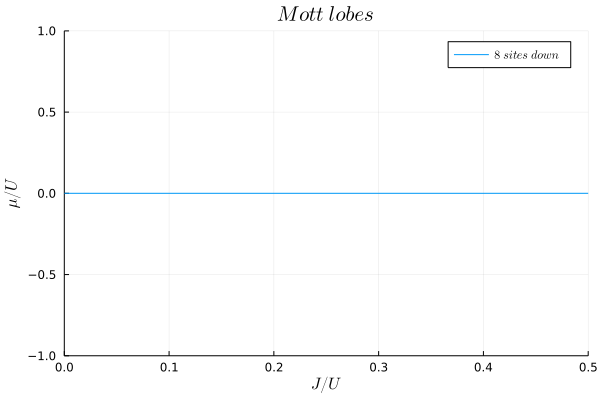

In [47]:
#graph
t = 0:0.01:0.50
plot(t,valuesofen-valuesofenlow , xlabel =L"J/U", ylabel=L"\mu/U", title =L"Mott~lobes", label =L"8~sites~down", xlims=(0, 0.50), ylims=(-1,1))


In [11]:
valuesofenlow

101-element Vector{Any}:
  0.0
 -0.0004999903076399193
 -0.0019998895295211434
 -0.004499663768179689
 -0.007999629599691969
 -0.01250074594995853
 -0.018004867732456936
 -0.02451494993888504
 -0.032035191473955324
 -0.0405711087503941
 -0.05012953001895573
 -0.06071850277236629
 -0.07234710854734548
  ⋮
 -2.932543036019944
 -2.9787033718783142
 -3.0249173264993994
 -3.0711833096390766
 -3.117499795807135
 -3.1638653208960648
 -3.2102784790226906
 -3.2567379195668726
 -3.303242344393105
 -3.3497905052418693
 -3.3963812012785004
 -3.4430132767886836